### Final NN3 Model & Its Confusion Matrix

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

model_nn3 = Sequential()
model_nn3.add(Dense(42, activation='tanh',
                    kernel_regularizer=regularizers.l2(0.001),
                    bias_regularizer=regularizers.l2(0.001)))  # Input layer
model_nn3.add(Dropout(0))
model_nn3.add(Dense(10, activation='tanh',
                    kernel_regularizer=regularizers.l2(0.001),
                    bias_regularizer=regularizers.l2(0.001)))  # hidden layer 1
model_nn3.add(Dropout(0.1))
model_nn3.add(Dense(22, activation='tanh',
                    kernel_regularizer=regularizers.l2(0.001),
                    bias_regularizer=regularizers.l2(0.001)))  # hidden layer 2
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(41, activation='tanh',
                    kernel_regularizer=regularizers.l2(0.001),
                    bias_regularizer=regularizers.l2(0.001)))  # hidden layer 3
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(1, activation='sigmoid'))  # Output layer
model_nn3.compile(loss=BinaryCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[f1, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_nn3.fit(X_train, y_train, epochs=100)

              precision    recall  f1-score   support

           0       0.81      0.67      0.73    104291
           1       0.44      0.63      0.52     43705

    accuracy                           0.66    147996
   macro avg       0.63      0.65      0.63    147996
weighted avg       0.70      0.66      0.67    147996



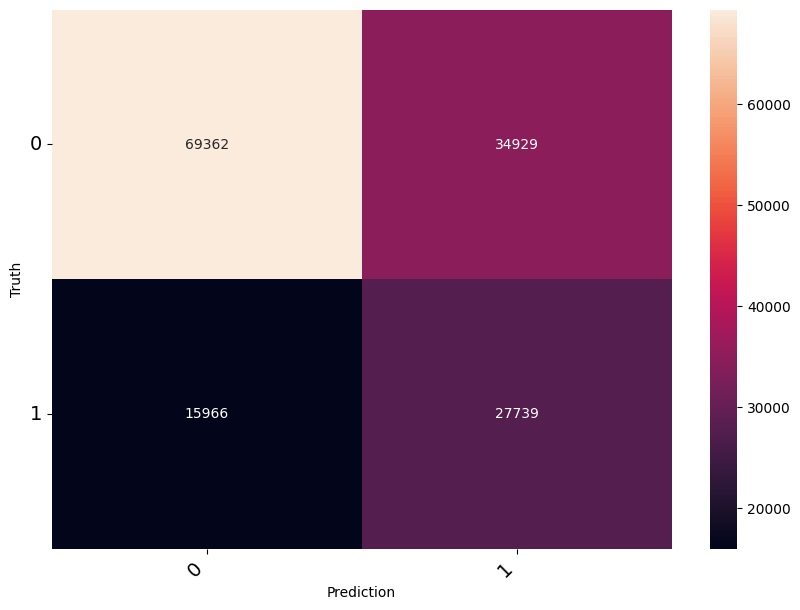

In [45]:
y_pred_prob_nn3 = model_nn3.predict(X_test)
y_pred_nn3 = np.where(y_pred_prob_nn3 > 0.5, 1, 0)[:, 0]
confusion_matrixs = confusion_matrix(y_test,y_pred_nn3)
print_confusion_matrix(confusion_matrixs,['0','1'])
print(classification_report(y_test,y_pred_nn3))

### Prediction Probability Distribution Plot of Final NN3 Model

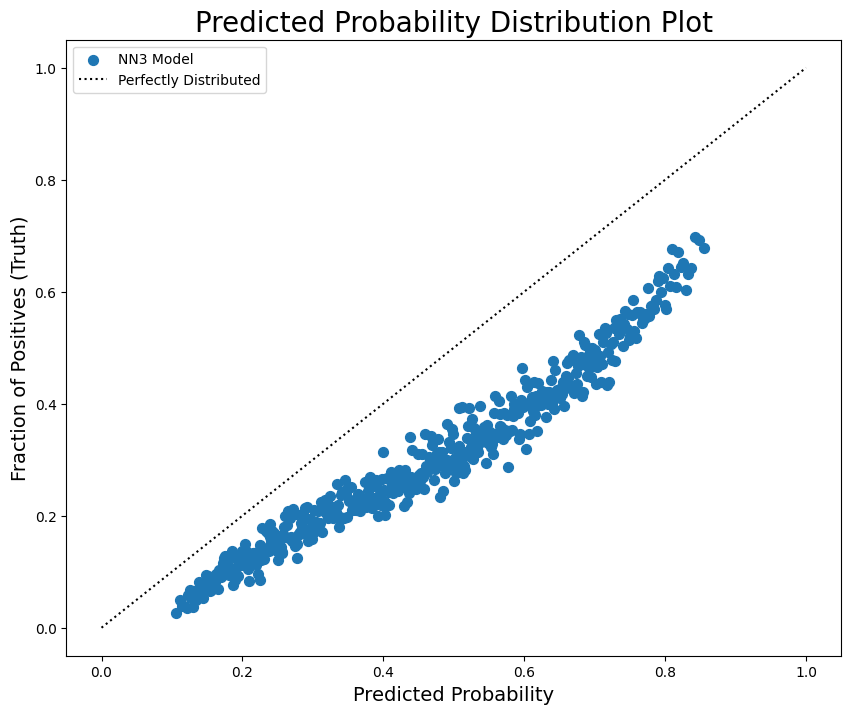

In [192]:
predicted_prob = model_nn3.predict(X_validation)
probability = pd.DataFrame(y_validation)
probability.columns= ['truth']
probability['predicted_prob'] = predicted_prob
plot_distribution_predictions(y_proba_pred=probability['predicted_prob'],
                              y_true=probability['truth'],
                              labels='NN3 Model',x_bins=500)